# **Deep Learning Project: Street View Housing Number Digit Recognition**


--------------
## **Context**
--------------

One of the most interesting tasks in deep learning is to recognize objects in natural scenes. The ability to process visual information using machine learning algorithms can be very useful as demonstrated in various applications.

The SVHN dataset contains over 600,000 labeled digits cropped from street-level photos. It is one of the most popular image recognition datasets. It has been used in neural networks created by Google to improve the map quality by automatically transcribing the address numbers from a patch of pixels. The transcribed number with a known street address helps pinpoint the location of the building it represents.

----------------
## **Objective**
----------------

Our objective is to predict the number depicted inside the image by using Artificial or Fully Connected Feed Forward Neural Networks and Convolutional Neural Networks. We will go through various models of each and finally select the one that is giving us the best performance.

-------------
## **Dataset**
-------------
Here, we will use a subset of the original data to save some computation time. The dataset is provided as a .h5 file. The basic preprocessing steps have been applied on the dataset.

## **Mount the drive**

Let us start by mounting the Google drive. You can run the below cell to mount the Google drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Importing the necessary libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf

# Keras Sequential Model
from tensorflow.keras.models import Sequential

# Importing all the different layers and optimizers
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Activation, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend

# For one-hot encoding
from tensorflow.keras.utils import to_categorical

In [ ]:
# Import h5py to read the file
import h5py

**Let us check the version of tensorflow.**

In [ ]:
tf.__version__

'2.12.0'

## **Load the dataset**

- Let us now load the dataset that is available as a .h5 file.
- Split the data into the train and the test dataset.

In [ ]:
h5f = h5py.File('/content/drive/MyDrive/SVHN_single_grey1.h5', 'r')

In [ ]:
# see which datasets are available
list(h5f.keys())

['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']

In [ ]:
# Load the training and test datasets

X_train = h5f['X_train'][:]

y_train = h5f['y_train'][:]

X_test = h5f['X_test'][:]

y_test = h5f['y_test'][:]


# Close this file

h5f.close()

Check the number of images in the training and the testing dataset.

In [ ]:
len(X_train), len(X_test)

(42000, 18000)

**Observation:**

## **Visualizing images**

- Use X_train to visualize the first 10 images.
- Use Y_train to print the first 10 labels.

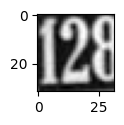

Label of the above image is 2


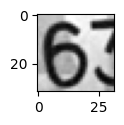

Label of the above image is 6


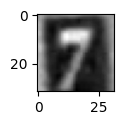

Label of the above image is 7


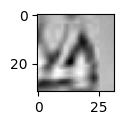

Label of the above image is 4


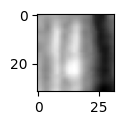

Label of the above image is 4


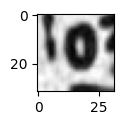

Label of the above image is 0


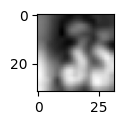

Label of the above image is 3


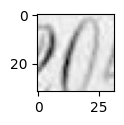

Label of the above image is 0


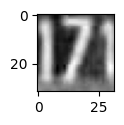

Label of the above image is 7


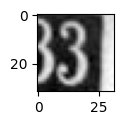

Label of the above image is 3


In [ ]:
for i in range(10):
  plt.figure(figsize = (10, 1))
  plt.imshow(X_train[i], cmap='gray')
  plt.show()
  print('Label of the above image is {}'.format(y_train[i]))

## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

Print the shapes of Training and Test data

In [ ]:
print("The shape of the first image is {}".format(X_train[0].shape))

The shape of the first image is (32, 32)


In [ ]:
# Print the array of pixels for the first image
X_train[0]

array([[ 33.0704,  30.2601,  26.852 , ...,  71.4471,  58.2204,  42.9939],
       [ 25.2283,  25.5533,  29.9765, ..., 113.0209, 103.3639,  84.2949],
       [ 26.2775,  22.6137,  40.4763, ..., 113.3028, 121.775 , 115.4228],
       ...,
       [ 28.5502,  36.212 ,  45.0801, ...,  24.1359,  25.0927,  26.0603],
       [ 38.4352,  26.4733,  23.2717, ...,  28.1094,  29.4683,  30.0661],
       [ 50.2984,  26.0773,  24.0389, ...,  49.6682,  50.853 ,  53.0377]],
      dtype=float32)

### **Normalize the train and the test data**

In [ ]:
# Normalize the train and test dataset by dividing by 255
X_train = X_train / 255
X_test = X_test / 255

# Verify that the first image has been normalized
X_train[0]

array([[0.12968785, 0.11866706, 0.10530196, ..., 0.2801847 , 0.2283153 ,
        0.16860352],
       [0.09893451, 0.10020902, 0.1175549 , ..., 0.4432192 , 0.40534863,
        0.33056822],
       [0.10304902, 0.08868118, 0.15873058, ..., 0.44432473, 0.47754902,
        0.45263842],
       ...,
       [0.11196157, 0.14200786, 0.17678471, ..., 0.09465059, 0.09840274,
        0.10219726],
       [0.15072627, 0.10381687, 0.09126157, ..., 0.11023294, 0.11556196,
        0.11790627],
       [0.19724864, 0.10226392, 0.0942702 , ..., 0.19477727, 0.19942354,
        0.20799099]], dtype=float32)

In [ ]:
# Shape of the first training image before reshaping
X_train[0].shape

(32, 32)

In [ ]:
# Reshape the 2D image into 1D space
X_train = X_train.reshape(X_train.shape[0], 1024)
X_test = X_test.reshape(X_test.shape[0], 1024)

In [ ]:
# Shape of the first image after reshaping
X_train[0].shape

(1024,)

### **One-hot encode output**

In [ ]:
# One-hot encode the labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# View test labels
y_test

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

**Observation:**

* The training data is not perfectly clean. Some of the examples have other numbers to the left and right of the target that might make training more difficult. Depending on model performance and time allowed, it might make sense to clean the training data more.

## **Model Building**

Now that we have done the data preprocessing, let's build an ANN model.

### Fix the seed for random number generators

In [ ]:
# Fix the seed for random number generators

np.random.seed(100)

import random

random.seed(100)
tf.random.set_seed(100)

### **Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **64 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **32 nodes and the relu activation**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_1 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train an ANN model as per the above mentioned architecture.**

In [ ]:
# Define the model

def nn_model_1():
  model = Sequential()

  # Add layers

  # This adds the input layer (by specifying input dimesion) AND the first hidden layer (units)
  model.add(Dense(activation='relu', input_dim=1024, units=64))

  # This adds the second hidden layer with 32 nodes
  model.add(Dense(32, activation='relu'))

  # This adds the output layer with number of nodes equal to number of classes
  model.add(Dense(10, activation = 'softmax'))

  # Compile
  model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

  return model

In [ ]:
# Call the model and store as a new variable
model = nn_model_1()

In [ ]:
# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                65600     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 68,010
Trainable params: 68,010
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Fit on train data and store as history
history = model.fit(X_train, y_train,
                    validation_split=0.2,
                    epochs=20,
                    batch_size=128, verbose=1
                    )

Epoch 1/20
263/263 [==============================] - 6s 19ms/step - loss: 2.3048 - accuracy: 0.0978 - val_loss: 2.3024 - val_accuracy: 0.0974
Epoch 2/20
263/263 [==============================] - 2s 6ms/step - loss: 2.2914 - accuracy: 0.1094 - val_loss: 2.2631 - val_accuracy: 0.1224
Epoch 3/20
263/263 [==============================] - 1s 5ms/step - loss: 2.2116 - accuracy: 0.1545 - val_loss: 2.1541 - val_accuracy: 0.1885
Epoch 4/20
263/263 [==============================] - 1s 6ms/step - loss: 2.0111 - accuracy: 0.2677 - val_loss: 1.8491 - val_accuracy: 0.3645
Epoch 5/20
263/263 [==============================] - 2s 7ms/step - loss: 1.6511 - accuracy: 0.4490 - val_loss: 1.5453 - val_accuracy: 0.4788
Epoch 6/20
263/263 [==============================] - 2s 8ms/step - loss: 1.4408 - accuracy: 0.5244 - val_loss: 1.4264 - val_accuracy: 0.5308
Epoch 7/20
263/263 [==============================] - 2s 9ms/step - loss: 1.3575 - accuracy: 0.5567 - val_loss: 1.3558 - val_accuracy: 0.5621
Epoch

### **Plot the Training and Validation Accuracies and write down your Observations.**

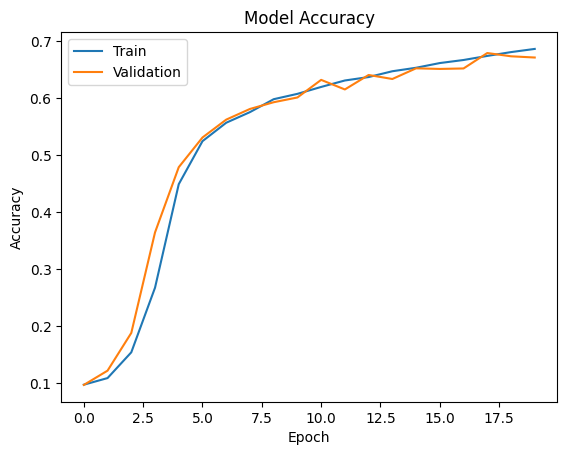

563/563 [==============================] - 5s 8ms/step - loss: 1.0767 - accuracy: 0.6736


In [ ]:
# Capture the learning history for each epoch
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Print the results
results = model.evaluate(X_test, y_test)

**Observations:**

* Training and validation accuracy continues to increase with each epoch
* Perhaps a more complex model could give better performance
* Overall accuracy of this model is 68%

Let's build one more model with higher complexity and see if we can improve the performance of the model.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [ ]:
backend.clear_session()
np.random.seed(100)
random.seed(100)
tf.random.set_seed(100)

### **Second Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **256 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **128 nodes and the relu activation**
 - Add the **Dropout layer with the rate equal to 0.2**
 - Third hidden layer with **64 nodes and the relu activation**
 - Fourth hidden layer with **64 nodes and the relu activation**
 - Fifth hidden layer with **32 nodes and the relu activation**
 - Add the **BatchNormalization layer**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 -Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.0005), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_2 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the new ANN model as per the above mentioned architecture**

In [ ]:
# Define the model

def nn_model_2():
  model = Sequential()

  # Add layers

  # This adds the input layer (by specifying input dimesion) AND the first hidden layer (units)
  model.add(Dense(activation='relu', input_dim=1024, units=256))

  # This adds the second hidden layer with 128 nodes
  model.add(Dense(128, activation='relu'))

  # This adds the Dropout layer
  model.add(Dropout(0.2))

  # This adds the third hidden layer
  model.add(Dense(64, activation='relu'))

  # This adds the fourth hidden layer
  model.add(Dense(64, activation='relu'))

  # This adds the fifth hidden layer
  model.add(Dense(32, activation='relu'))

  # Adds the batch normalization layer
  model.add(BatchNormalization())

  # Add the output layer
  model.add(Dense(10, activation='softmax'))

  # Compile
  optimizer = tf.keras.optimizers.Adam(.0005)
  model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

  return model

In [ ]:
# Call the model and store as a new variable
model = nn_model_2()

# Print the model summary
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               262400    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization (BatchN  (None, 32)               1

In [ ]:
# Fit on train data and store as history
history = model.fit(X_train, y_train,
                    validation_split=0.2,
                    epochs=30,
                    batch_size=128, verbose=1
                    )

Epoch 1/30
263/263 [==============================] - 7s 12ms/step - loss: 2.3717 - accuracy: 0.1005 - val_loss: 2.3057 - val_accuracy: 0.1025
Epoch 2/30
263/263 [==============================] - 3s 12ms/step - loss: 2.1920 - accuracy: 0.1821 - val_loss: 2.0722 - val_accuracy: 0.2854
Epoch 3/30
263/263 [==============================] - 4s 14ms/step - loss: 1.7820 - accuracy: 0.3722 - val_loss: 1.6190 - val_accuracy: 0.4354
Epoch 4/30
263/263 [==============================] - 5s 19ms/step - loss: 1.5565 - accuracy: 0.4592 - val_loss: 1.4498 - val_accuracy: 0.5142
Epoch 5/30
263/263 [==============================] - 4s 16ms/step - loss: 1.3879 - accuracy: 0.5326 - val_loss: 1.2719 - val_accuracy: 0.5831
Epoch 6/30
263/263 [==============================] - 3s 12ms/step - loss: 1.2429 - accuracy: 0.5886 - val_loss: 1.2613 - val_accuracy: 0.5710
Epoch 7/30
263/263 [==============================] - 4s 14ms/step - loss: 1.1533 - accuracy: 0.6212 - val_loss: 1.1387 - val_accuracy: 0.6283

### **Plot the Training and Validation Accuracies and write down your Observations.**

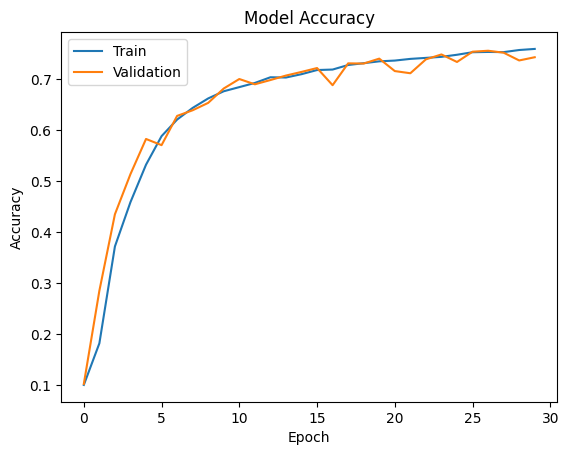

563/563 [==============================] - 5s 8ms/step - loss: 0.8042 - accuracy: 0.7452


In [ ]:
# Capture the learning history for each epoch
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Print the results
results = model.evaluate(X_test, y_test)

**Observations:_______**
* Overall model accuracy is 74%
* Training and validation accuracy are similar - the model does not seem to be overfitting
* Accuracy increases dramatically until epoch 10 and then increases more slowly
* We continue to see improvement in accuracy through epoch 30, perhaps a more complicated model could do better
* There is some noise in the validation loss behavior

## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

In [ ]:
# Get predictions for y_test

y_pred = model.predict(X_test)

563/563 [==============================] - 2s 3ms/step


**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [ ]:
# Converting each entry of y_pred to single label from one-hot encoded vector

y_pred = np.argmax(y_pred, axis = -1)

In [ ]:
y_pred

array([2, 7, 2, ..., 7, 9, 2])

In [ ]:
# Converting each entry of y_test to single label from one-hot encoded vector

y_test_labels = np.argmax(y_test, axis=-1)

### **Print the classification report and the confusion matrix for the test predictions. Write your observations on the final results.**

In [ ]:
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

# Print the classification report
print(classification_report(y_test_labels, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.76      0.77      1814
           1       0.78      0.78      0.78      1828
           2       0.67      0.83      0.74      1803
           3       0.69      0.70      0.70      1719
           4       0.84      0.79      0.81      1812
           5       0.72      0.67      0.69      1768
           6       0.71      0.77      0.74      1832
           7       0.78      0.80      0.79      1808
           8       0.70      0.69      0.70      1812
           9       0.83      0.66      0.73      1804

    accuracy                           0.75     18000
   macro avg       0.75      0.74      0.74     18000
weighted avg       0.75      0.75      0.75     18000



<Axes: >

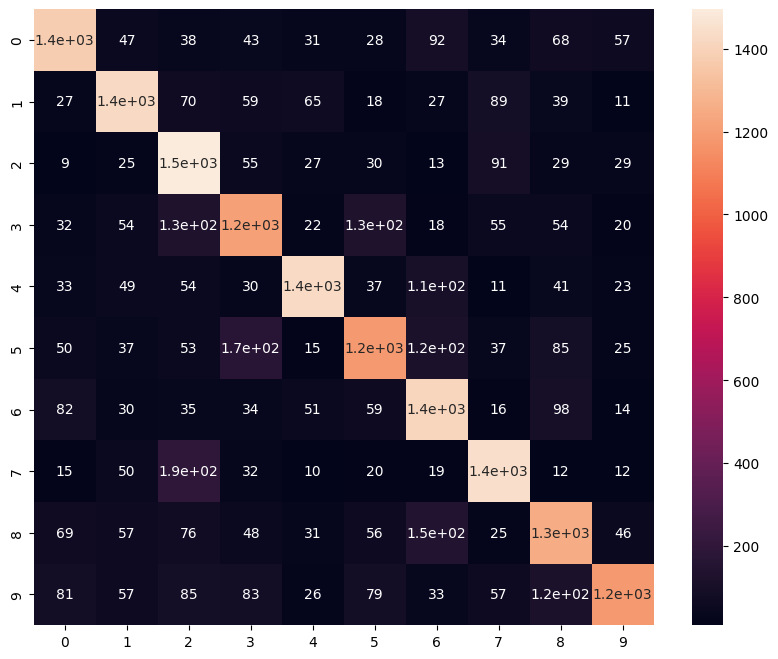

In [ ]:
# Create the confusion matrix
cm = confusion_matrix(y_test_labels, y_pred)

# Plot the confusion matrix as a heat map
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True)

**Final Observations:__________**
* Most of the classes were predicted correctly
* Misclassification happens most frequently with 2 and 7, 5 and 3, 6 and 8
* Overall recall is 75% and precision is 75%
* Most digits have a fairly high recall and precision
* Digits 5, 8 and 9 have the lowest recall
* Digits 2 and 3 have the lowest precision

## **Using Convolutional Neural Networks**

### **Load the dataset again and split the data into the train and the test dataset.**

In [ ]:
h5f = h5py.File('/content/drive/MyDrive/SVHN_single_grey1.h5', 'r')

# Load the training and test datasets

X_train = h5f['X_train'][:]

y_train = h5f['y_train'][:]

X_test = h5f['X_test'][:]

y_test = h5f['y_test'][:]


# Close this file

h5f.close()

Check the number of images in the training and the testing dataset.

In [ ]:
# Print the shape of the training and test dataset

print(X_train.shape, X_test.shape)

(42000, 32, 32) (18000, 32, 32)


**Observation:**

* There are 42,000 training images and 18,000 test images


## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Reshape the train and the test dataset because we always have to give a 4D array as input to CNNs.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [ ]:
print(X_train[0].shape)

(32, 32)


In [ ]:
print(X_train[0])

[[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


Reshape the dataset to be able to pass them to CNNs. Remember that we always have to give a 4D array as input to CNNs

In [ ]:
# Reshape to a 4D array

X_train = X_train.reshape(X_train.shape[0], 32, 32, 1)

X_test = X_test.reshape(X_test.shape[0], 32, 32, 1)

Normalize inputs from 0-255 to 0-1

In [ ]:
# Normalize inputs from 0-255 to 0-1

X_train = X_train / 255.0

X_test = X_test / 255.0

Print New shape of Training and Test

In [ ]:
# Print the new shape of training and test

print(X_train.shape, X_test.shape)

(42000, 32, 32, 1) (18000, 32, 32, 1)


In [ ]:
# Examine the values for the first training image in the reshaped format

print(X_train[0])

[[[0.12968785]
  [0.11866706]
  [0.10530196]
  ...
  [0.2801847 ]
  [0.2283153 ]
  [0.16860352]]

 [[0.09893451]
  [0.10020902]
  [0.1175549 ]
  ...
  [0.4432192 ]
  [0.40534863]
  [0.33056822]]

 [[0.10304902]
  [0.08868118]
  [0.15873058]
  ...
  [0.44432473]
  [0.47754902]
  [0.45263842]]

 ...

 [[0.11196157]
  [0.14200786]
  [0.17678471]
  ...
  [0.09465059]
  [0.09840274]
  [0.10219726]]

 [[0.15072627]
  [0.10381687]
  [0.09126157]
  ...
  [0.11023294]
  [0.11556196]
  [0.11790627]]

 [[0.19724864]
  [0.10226392]
  [0.0942702 ]
  ...
  [0.19477727]
  [0.19942354]
  [0.20799099]]]


### **One-hot encode the labels in the target variable y_train and y_test.**

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

**Observation:**

* The training data is now 42,000 x 32 x 32 x 1
* The test data is now 18,000 x 32 x 32 x 1


## **Model Building**

Now that we have done data preprocessing, let's build a CNN model.
Fix the seed for random number generators

In [ ]:
# Fixing the seed for random number generators
import random
np.random.seed(100)
random.seed(100)
tf.random.set_seed(100)

### **Model Architecture**
- **Write a function** that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Another **LeakyRelu** with the **slope equal to 0.1**
 - A **max-pooling layer** with a **pool size of 2x2**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_1 and store the output in a new variable.
- Print the summary of the model.
- Fit the model on the training data with a **validation split of 0.2, batch size = 32, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train a CNN model as per the above mentioned architecture.**

In [ ]:
def cnn_model_1():
  model = Sequential()

  # Convolutional layer with 16 filters and kernel size of 3x3
  model.add(Conv2D(16, (3,3), activation='relu', padding="same", input_shape=(32,32,1)))

  # LeakyReLU layer with slope equal to 0.1
  model.add(LeakyReLU(alpha=0.1))

  # Second convolutional layer with 32 filters and kernel size of 3x3 with same padding
  model.add(Conv2D(32, (3,3), padding="same"))

  # LeakyReLU with slope equal to 0.1
  model.add(LeakyReLU(alpha=0.1))

  # Max pooling layer
  model.add(MaxPooling2D(2,2))

  # flatten the output of the conv layer after max pooling
  model.add(Flatten())

  # Dense layer with 32 nodes
  model.add(Dense(32, activation='relu'))

  #LeakyReLU with slope 0.1
  model.add(LeakyReLU(alpha=0.1))

  # Output layer
  model.add(Dense(10, activation='softmax'))

  # Optimizer
  opt = Adam(learning_rate=0.001)

  # Compile model
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

  return model

In [ ]:
cnn_model_1 = cnn_model_1()

In [ ]:
cnn_model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                      

In [ ]:
# Fit the model on the training data with a validation split of 0.2, batch size = 32, verbose = 1, and epochs = 20. Store the model building history to use later for visualization

history = cnn_model_1.fit(
    X_train, y_train,
    epochs=20,
    validation_split=0.2,
    batch_size=32,
    verbose=1
)

Epoch 1/20
1050/1050 [==============================] - 102s 96ms/step - loss: 1.4228 - accuracy: 0.5153 - val_loss: 0.7178 - val_accuracy: 0.7921
Epoch 2/20
1050/1050 [==============================] - 99s 95ms/step - loss: 0.6293 - accuracy: 0.8166 - val_loss: 0.6077 - val_accuracy: 0.8257
Epoch 3/20
1050/1050 [==============================] - 95s 90ms/step - loss: 0.5410 - accuracy: 0.8418 - val_loss: 0.5514 - val_accuracy: 0.8436
Epoch 4/20
1050/1050 [==============================] - 94s 90ms/step - loss: 0.4872 - accuracy: 0.8573 - val_loss: 0.5375 - val_accuracy: 0.8463
Epoch 5/20
1050/1050 [==============================] - 99s 94ms/step - loss: 0.4489 - accuracy: 0.8695 - val_loss: 0.5127 - val_accuracy: 0.8526
Epoch 6/20
1050/1050 [==============================] - 94s 90ms/step - loss: 0.4142 - accuracy: 0.8790 - val_loss: 0.5054 - val_accuracy: 0.8588
Epoch 7/20
1050/1050 [==============================] - 95s 90ms/step - loss: 0.3838 - accuracy: 0.8895 - val_loss: 0.4872 

### **Plot the Training and Validation Accuracies and Write your observations.**

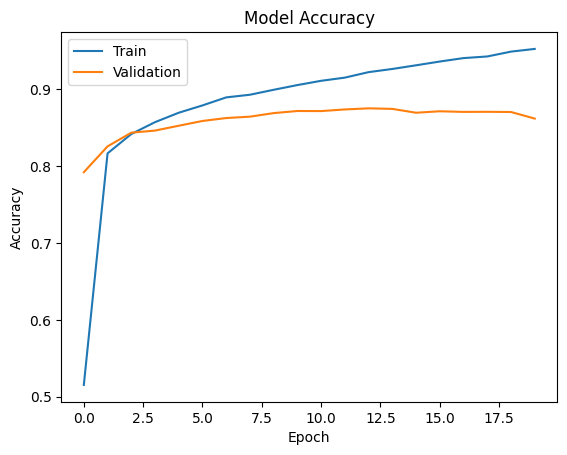

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Observations:__________**
* Training accuracy continued to improve while validation accuracy flattened out after epoch 2 around 85%
* This model might be too complex and overfitting

Let's build another model and see if we can get a better model with generalized performance.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

### **Second Model Architecture**

- Write a function that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add **LeakyRelu** with the **slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - Third Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Fourth Convolutional layer **64 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **dropout layer with the rate equal to 0.5**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **categorical_crossentropy loss, adam optimizers (learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_2 and store the model in a new variable.
- Print the summary of the model.
- Fit the model on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train the second CNN model as per the above mentioned architecture.**

In [ ]:
def cnn_model_2():
  model = Sequential()

  # Convolutional layer with 16 filters and kernel size of 3x3
  model.add(Conv2D(16, (3,3), padding="same", input_shape=(32,32,1)))

  # LeakyReLU layer with slope equal to 0.1
  model.add(LeakyReLU(alpha=0.1))

  # Second convolutional layer with 32 filters and kernel size of 3x3 with same padding
  model.add(Conv2D(32, (3,3), padding="same"))

  # LeakyReLU with slope equal to 0.1
  model.add(LeakyReLU(alpha=0.1))

  # Max pooling layer
  model.add(MaxPooling2D(2,2))

  # Adds the batch normalization layer
  model.add(BatchNormalization())

  # Third convolutional layer
  model.add(Conv2D(32, (3,3), padding="same"))

  # LeakyReLU with slope equal to 0.1
  model.add(LeakyReLU(alpha=0.1))

  # Fourth convolutional layer
  model.add(Conv2D(64, (3,3), padding="same"))

  # LeakyReLU with slope equal to 0.1
  model.add(LeakyReLU(alpha=0.1))

  # Max Pool
  model.add(MaxPooling2D(2,2))

  # Batch Normalization
  model.add(BatchNormalization())

  # Flatten
  model.add(Flatten())

  # Dense Layer with 32 Nodes
  model.add(Dense(32))

  # LeakyRelu
  model.add(LeakyReLU(alpha=0.1))

  # Dropout
  model.add(Dropout(0.5))

  # Final output layer with nodes equal to number of classes
  model.add(Dense(10, activation='softmax'))

  # Adam optimizer with learning rate = .001
  opt = Adam(learning_rate=0.001)

  # Compile model
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

  return model

In [ ]:
cnn_model_2 = cnn_model_2()

In [ ]:
cnn_model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 32, 32, 16)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_1 (Batc  (None, 16, 16, 32)       128       
 hNormalization)                                      

In [ ]:
# Fit the model on the training data
history = cnn_model_2.fit(
    X_train, y_train,
    epochs=20,
    validation_split=0.2,
    batch_size=128,
    verbose=1
)

Epoch 1/20
263/263 [==============================] - 164s 619ms/step - loss: 1.4357 - accuracy: 0.5100 - val_loss: 1.9675 - val_accuracy: 0.2975
Epoch 2/20
263/263 [==============================] - 153s 581ms/step - loss: 0.6619 - accuracy: 0.7965 - val_loss: 0.4803 - val_accuracy: 0.8562
Epoch 3/20
263/263 [==============================] - 157s 598ms/step - loss: 0.5465 - accuracy: 0.8333 - val_loss: 0.4292 - val_accuracy: 0.8757
Epoch 4/20
263/263 [==============================] - 154s 585ms/step - loss: 0.4820 - accuracy: 0.8533 - val_loss: 0.3945 - val_accuracy: 0.8871
Epoch 5/20
263/263 [==============================] - 156s 591ms/step - loss: 0.4352 - accuracy: 0.8660 - val_loss: 0.4661 - val_accuracy: 0.8614
Epoch 6/20
263/263 [==============================] - 157s 599ms/step - loss: 0.4096 - accuracy: 0.8765 - val_loss: 0.3819 - val_accuracy: 0.8912
Epoch 7/20
263/263 [==============================] - 157s 596ms/step - loss: 0.3706 - accuracy: 0.8854 - val_loss: 0.3502 -

### **Plot the Training and Validation accuracies and write your observations.**

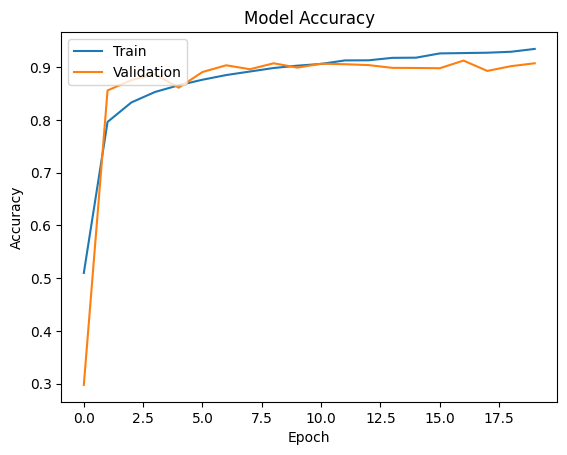

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Observations:________**
* This model took a really long time to train
* Validation accuracy reaches about 90% after 5 epochs and then does not improve much after
* 90% accuracy is quite good and better than any of the other models we tried

## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

### **Make predictions on the test data using the second model.**

In [ ]:
# Predict on the test data set

test_pred = cnn_model_2.predict(X_test)



563/563 [==============================] - 25s 44ms/step


**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector, but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [ ]:
test_pred = np.argmax(test_pred, axis = -1)

In [ ]:
test_pred

array([1, 7, 2, ..., 7, 5, 2])

In [ ]:
y_test_labels

array([1, 7, 2, ..., 7, 9, 2])

### **Write your final observations on the performance of the model on the test data.**

<Axes: >

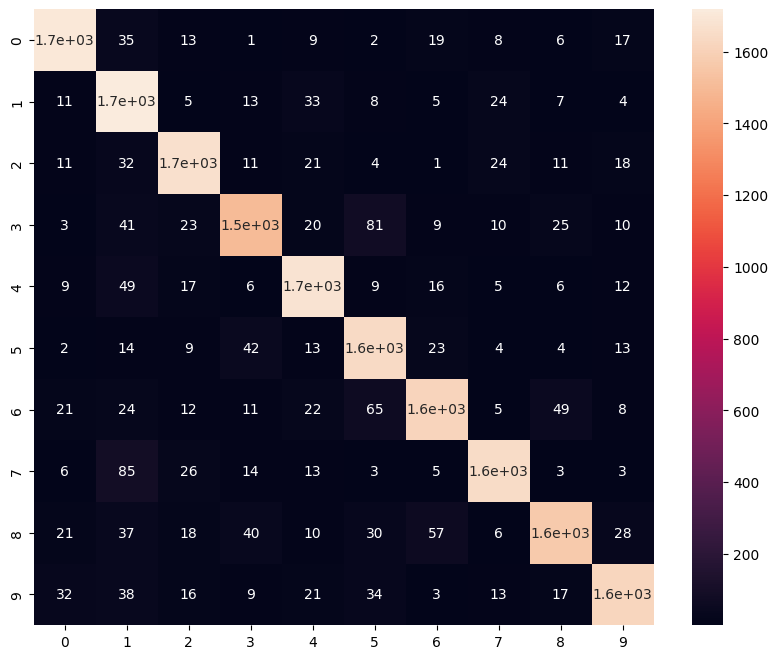

In [ ]:
# Create the confusion matrix
cm = confusion_matrix(y_test_labels, test_pred)

# Plot the confusion matrix as a heat map
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True)

In [ ]:
print(classification_report(y_test_labels, test_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1814
           1       0.83      0.94      0.88      1828
           2       0.92      0.93      0.92      1803
           3       0.91      0.87      0.89      1719
           4       0.91      0.93      0.92      1812
           5       0.87      0.93      0.90      1768
           6       0.92      0.88      0.90      1832
           7       0.94      0.91      0.93      1808
           8       0.92      0.86      0.89      1812
           9       0.93      0.90      0.92      1804

    accuracy                           0.91     18000
   macro avg       0.91      0.91      0.91     18000
weighted avg       0.91      0.91      0.91     18000



**Final Observations:_________**

* The second CNN model produces much better results than the second fully connected network
* Precision and Recall are 91% for the CNN compared to around 75% for the second ANN model
* Almost all the digits are predicted correctly in the confusion matrix, where the ANN model got some digits confused
* However, the CNN model took much longer to train